In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/Users/sandeepsrinivasdwaram/Documents/business_failures/business_failures_franceData_2014-2024.csv")

In [3]:
df

,YearQuarterId,YearGroupId,Year,Quarter,FailureUnit,Zone,ZoneCategory,Location,Capital,Region,Direction,LocationCategory,CalandarYear
0,2018-Q1,G2018,01/01/2018,Q1,26,1,Low,Ariège,Foix,Occitanie,South,D,2018
1,2018-Q1,G2018,01/01/2018,Q1,44,1,Low,Cher,Bourges,Centre-ValdeLoire,Central,D,2018
2,2018-Q1,G2018,01/01/2018,Q1,87,2,Medium,Côtes-d'Armor,SaintBrieuc,Bretagne,NorthWest,D,2018
3,2018-Q1,G2018,01/01/2018,Q1,116,3,High,Dordogne,\tPérigueux,Nouvelle-Aquitaine,SouthWest,D,2018
4,2018-Q1,G2018,01/01/2018,Q1,84,2,Medium,Doubs,\tBesançon,Bourgogne-Franche-Comté,East,D,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4967,2017-Q4,G2017,01/10/2017,Q4,139,3,High,Martinique,Fort-de-France,Nil,Nil,C,2017
4968,2017-Q4,G2017,01/10/2017,Q4,7,1,Low,FrenchGuiana,Cayenne,Nil,Nil,C,2017
4969,2017-Q4,G2017,01/10/2017,Q4,110,3,High,Guadeloupe,Basse-Terre,Nil,Nil,C,2017
4970,2017-Q4,G2017,01/10/2017,Q4,9,1,Low,FrenchTeritories,Nil,Nil,Nil,C,2017


In [4]:
df.columns

Index(['YearQuarterId', 'YearGroupId', 'Year', 'Quarter', 'FailureUnit',
       'Zone', 'ZoneCategory', 'Location', 'Capital', 'Region', 'Direction',
       'LocationCategory', 'CalandarYear'],
      dtype='object')

In [5]:
df.dtypes

YearQuarterId       object
YearGroupId         object
Year                object
Quarter             object
FailureUnit          int64
Zone                 int64
ZoneCategory        object
Location            object
Capital             object
Region              object
Direction           object
LocationCategory    object
CalandarYear         int64
dtype: object

In [6]:
df['Year'] = pd.to_datetime(df['Year'])

In [7]:
df.head(10)

,YearQuarterId,YearGroupId,Year,Quarter,FailureUnit,Zone,ZoneCategory,Location,Capital,Region,Direction,LocationCategory,CalandarYear
0,2018-Q1,G2018,2018-01-01,Q1,26,1,Low,Ariège,Foix,Occitanie,South,D,2018
1,2018-Q1,G2018,2018-01-01,Q1,44,1,Low,Cher,Bourges,Centre-ValdeLoire,Central,D,2018
2,2018-Q1,G2018,2018-01-01,Q1,87,2,Medium,Côtes-d'Armor,SaintBrieuc,Bretagne,NorthWest,D,2018
3,2018-Q1,G2018,2018-01-01,Q1,116,3,High,Dordogne,\tPérigueux,Nouvelle-Aquitaine,SouthWest,D,2018
4,2018-Q1,G2018,2018-01-01,Q1,84,2,Medium,Doubs,\tBesançon,Bourgogne-Franche-Comté,East,D,2018
5,2018-Q1,G2018,2018-01-01,Q1,122,3,High,Drôme,Valence,Bourgogne-Franche-Comté,East,D,2018
6,2018-Q1,G2018,2018-01-01,Q1,44,1,Low,Gers,\tAuch,Occitanie,South,D,2018
7,2018-Q1,G2018,2018-01-01,Q1,46,2,Medium,Haute-Corse,\tBastia,Corse,South,D,2018
8,2018-Q1,G2018,2018-01-01,Q1,43,1,Low,Hautes-Pyrénées,Tarbes,Occitanie,South,D,2018
9,2018-Q1,G2018,2018-01-01,Q1,319,4,VeryHigh,Hauts-de-Seine,Nanterre,Île-de-France,NorthCentral,D,2018


In [8]:
df.dtypes

YearQuarterId               object
YearGroupId                 object
Year                datetime64[ns]
Quarter                     object
FailureUnit                  int64
Zone                         int64
ZoneCategory                object
Location                    object
Capital                     object
Region                      object
Direction                   object
LocationCategory            object
CalandarYear                 int64
dtype: object

Data Understanding and Summary Stats:

Summary Stats:

In [9]:
len(df['FailureUnit'].unique())

870

In [10]:
len(df['Year'].unique())

44

In [11]:
df['Location'] = df['Location'].str.strip()

In [12]:
df['Capital'] = df['Capital'].str.strip()

In [13]:
df.shape

(4972, 13)

In [14]:
df.columns

Index(['YearQuarterId', 'YearGroupId', 'Year', 'Quarter', 'FailureUnit',
       'Zone', 'ZoneCategory', 'Location', 'Capital', 'Region', 'Direction',
       'LocationCategory', 'CalandarYear'],
      dtype='object')

In [15]:
df.dtypes

YearQuarterId               object
YearGroupId                 object
Year                datetime64[ns]
Quarter                     object
FailureUnit                  int64
Zone                         int64
ZoneCategory                object
Location                    object
Capital                     object
Region                      object
Direction                   object
LocationCategory            object
CalandarYear                 int64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4972 entries, 0 to 4971
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   YearQuarterId     4972 non-null   object        
 1   YearGroupId       4972 non-null   object        
 2   Year              4972 non-null   datetime64[ns]
 3   Quarter           4972 non-null   object        
 4   FailureUnit       4972 non-null   int64         
 5   Zone              4972 non-null   int64         
 6   ZoneCategory      4972 non-null   object        
 7   Location          4972 non-null   object        
 8   Capital           4972 non-null   object        
 9   Region            4972 non-null   object        
 10  Direction         4972 non-null   object        
 11  LocationCategory  4972 non-null   object        
 12  CalandarYear      4972 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 505.1+ KB


In [17]:
df.describe()

,Year,FailureUnit,Zone,CalandarYear
count,4972,4972.000000,4972.000000,4972.000000
mean,2019-01-04 20:33:12.598551808,216.444489,2.496983,2018.997989
min,2014-01-01 00:00:00,0.000000,1.000000,2014.000000
25%,2016-01-07 00:00:00,44.750000,1.750000,2016.000000
50%,2019-01-04 00:00:00,94.000000,2.000000,2019.000000
75%,2022-01-01 00:00:00,208.000000,3.000000,2022.000000
max,2024-01-10 00:00:00,4219.000000,4.000000,2024.000000
std,NaN,378.445723,1.117603,3.162595


In [18]:
df.describe(include='all')

,YearQuarterId,YearGroupId,Year,Quarter,FailureUnit,Zone,ZoneCategory,Location,Capital,Region,Direction,LocationCategory,CalandarYear
count,4972,4972,4972,4972,4972.000000,4972.000000,4972,4972,4972,4972,4972,4972,4972.000000
unique,44,11,NaN,4,NaN,NaN,4,113,101,14,11,3,NaN
top,2018-Q1,G2018,NaN,Q1,NaN,NaN,Medium,Ariège,Nantes,Occitanie,SouthEast,D,NaN
freq,113,452,NaN,1243,NaN,NaN,1255,44,88,616,836,4180,NaN
mean,NaN,NaN,2019-01-04 20:33:12.598551808,NaN,216.444489,2.496983,NaN,NaN,NaN,NaN,NaN,NaN,2018.997989
min,NaN,NaN,2014-01-01 00:00:00,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000
25%,NaN,NaN,2016-01-07 00:00:00,NaN,44.750000,1.750000,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000
50%,NaN,NaN,2019-01-04 00:00:00,NaN,94.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000
75%,NaN,NaN,2022-01-01 00:00:00,NaN,208.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2022.000000
max,NaN,NaN,2024-01-10 00:00:00,NaN,4219.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,2024.000000


In [19]:
len(df['YearQuarterId'].unique())

44

In [20]:
df['YearGroupId'].value_counts()

YearGroupId
G2018    452
G2019    452
G2020    452
G2021    452
G2022    452
G2023    452
G2024    452
G2014    452
G2015    452
G2016    452
G2017    452
Name: count, dtype: int64

In [21]:
df['ZoneCategory'].value_counts()

ZoneCategory
Medium      1255
Low         1243
VeryHigh    1240
High        1234
Name: count, dtype: int64

In [22]:
df['Location'].value_counts()

Location
Ariège               44
Isère                44
Tarn                 44
Somme                44
Seine-Saint-Denis    44
                     ..
Cantal               44
Calvados             44
Bouches-du-Rhône     44
Bas-Rhin             44
Guadeloupe           44
Name: count, Length: 113, dtype: int64

In [23]:
df['Capital'].value_counts()

Capital
Nantes         88
Rennes         88
Paris          88
Strasbourg     88
Marseille      88
               ..
Caen           44
Rodez          44
Carcassonne    44
Troyes         44
Basse-Terre    44
Name: count, Length: 101, dtype: int64

In [24]:
df['Region'].value_counts(normalize=True,ascending=True)

Region
Corse                        0.026549
Bretagne                     0.044248
Nil                          0.044248
Centre-ValdeLoire            0.053097
PaysdelaLoire                0.053097
Hauts-de-France              0.053097
Normandie                    0.053097
Provence-Alpes-Côted'Azur    0.061947
Île-de-France                0.079646
Bourgogne-Franche-Comté      0.088496
GrandEst                     0.097345
Auvergne-Rhône-Alpes         0.106195
Nouvelle-Aquitaine           0.115044
Occitanie                    0.123894
Name: proportion, dtype: float64

In [25]:
df['Direction'].value_counts(ascending=True)

Direction
NorthWest       220
Nil             220
Central         264
West            264
NorthCentral    396
East            440
NorthEast       484
North           528
SouthWest       572
South           748
SouthEast       836
Name: count, dtype: int64

In [26]:
df['LocationCategory'].value_counts(normalize=True)

LocationCategory
D    0.840708
R    0.115044
C    0.044248
Name: proportion, dtype: float64

In [27]:
df['CalandarYear'].value_counts(dropna=False)

CalandarYear
2014    453
2018    452
2019    452
2020    452
2021    452
2022    452
2023    452
2015    452
2016    452
2017    452
2024    451
Name: count, dtype: int64

In [28]:
df['Zone'].value_counts(bins=5)

(1.6, 2.2]      1255
(0.996, 1.6]    1243
(3.4, 4.0]      1240
(2.8, 3.4]      1234
(2.2, 2.8]         0
Name: count, dtype: int64

In [29]:
df['FailureUnit'].value_counts(bins=10)

(-4.220000000000001, 421.9]    4345
(421.9, 843.8]                  349
(843.8, 1265.7]                 138
(1265.7, 1687.6]                 77
(1687.6, 2109.5]                 26
(2953.3, 3375.2]                 15
(2109.5, 2531.4]                 11
(3375.2, 3797.1]                  5
(2531.4, 2953.3]                  4
(3797.1, 4219.0]                  2
Name: count, dtype: int64

In [30]:
df.isnull().sum()

YearQuarterId       0
YearGroupId         0
Year                0
Quarter             0
FailureUnit         0
Zone                0
ZoneCategory        0
Location            0
Capital             0
Region              0
Direction           0
LocationCategory    0
CalandarYear        0
dtype: int64

<Axes: >

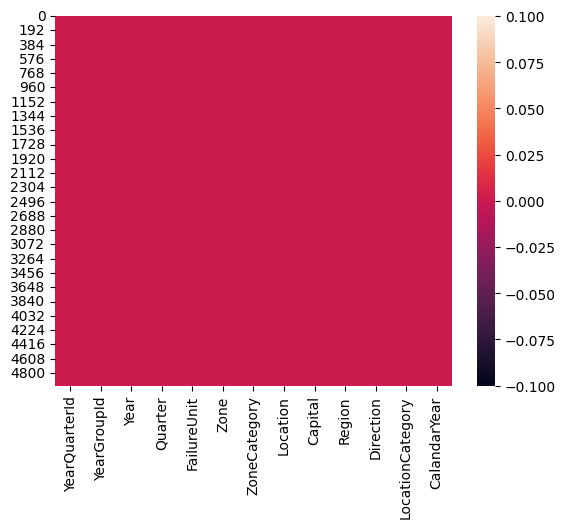

In [31]:
sns.heatmap(df.isnull())

Exploratory Analysis:

Univariate Analysis (Categorical and Numeric):

In [32]:
direction_counts = df['Direction'].value_counts()

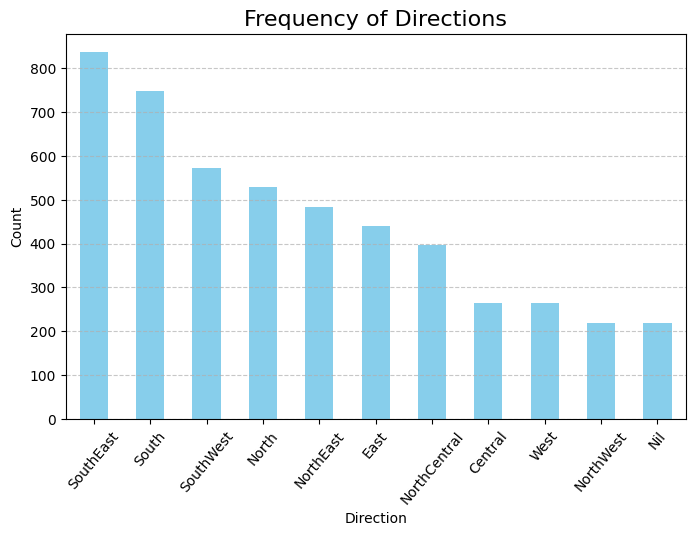

In [33]:
direction_counts.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Frequency of Directions', fontsize=16)
plt.xlabel('Direction', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [34]:
locationcategory_counts = df['LocationCategory'].value_counts()

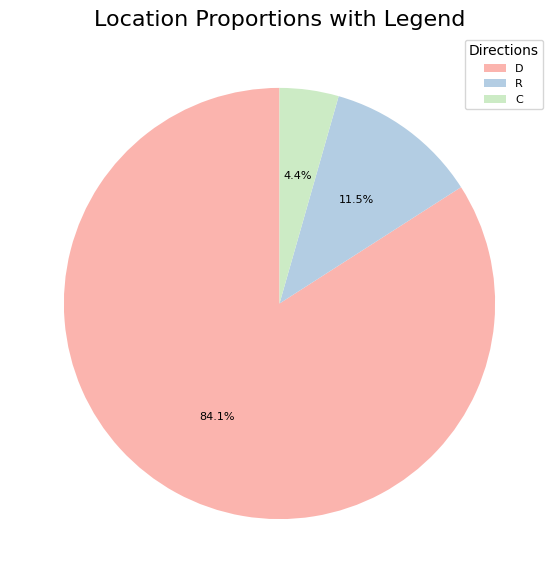

In [35]:
fig, ax = plt.subplots(figsize=(8,7))
wedges, texts, autotexts = ax.pie(
    locationcategory_counts, 
    labels=None,  # Suppress labels on the pie itself
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Pastel1.colors, 
    textprops={'fontsize': 8}
)
ax.legend(
    locationcategory_counts.index,  # Use the categories as labels
    title="Directions",  # Legend title
    loc="best",  # Position the legend automatically
    fontsize=8
)
# explode = [0.1] * len(locationcategory_counts)  # Explode all segments slightly
# ax.pie(locationcategory_counts, explode=explode,startangle=90)


plt.title('Location Proportions with Legend', fontsize=16)
plt.show()

<Figure size 500x500 with 0 Axes>

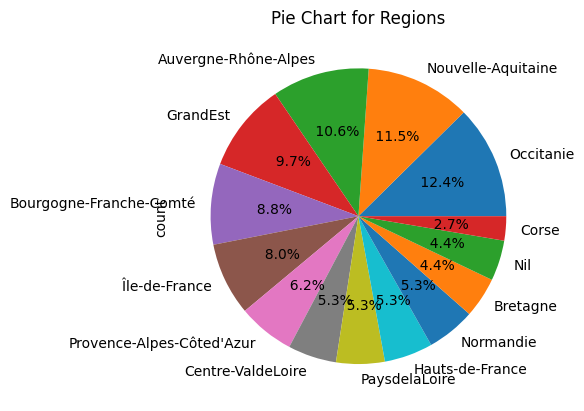

<Figure size 500x500 with 0 Axes>

In [36]:
plt.title('Pie Chart for Regions')
df['Region'].value_counts().plot(kind = "pie", autopct = "%5.1f%%")
plt.figure(figsize=(5,5))

Text(0, 0.5, 'Count')

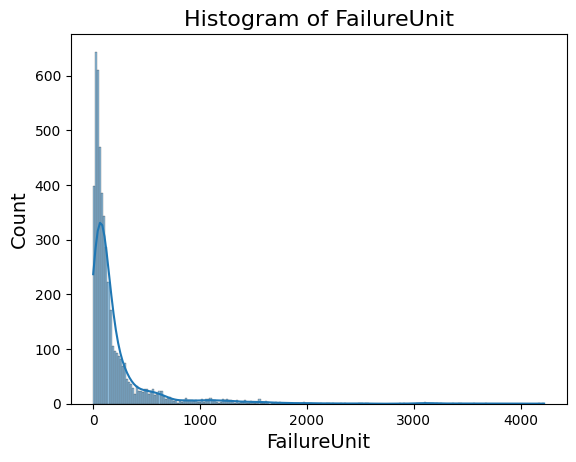

In [37]:
sns.histplot(df['FailureUnit'], kde=True)
plt.title('Histogram of FailureUnit', fontsize=16)
plt.xlabel('FailureUnit', fontsize=14)
plt.ylabel('Count', fontsize=14)

<Axes: xlabel='FailureUnit', ylabel='Density'>

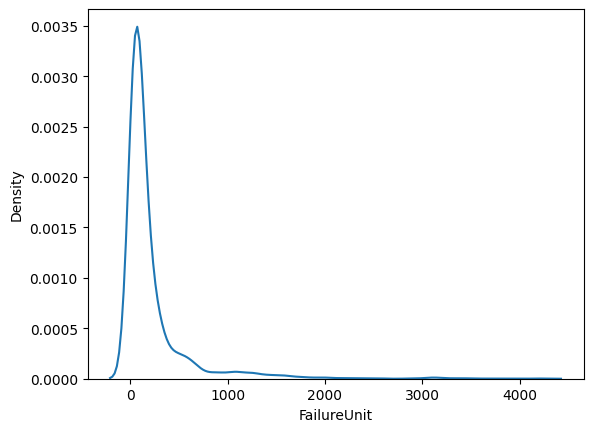

In [38]:
sns.kdeplot(df['FailureUnit'])

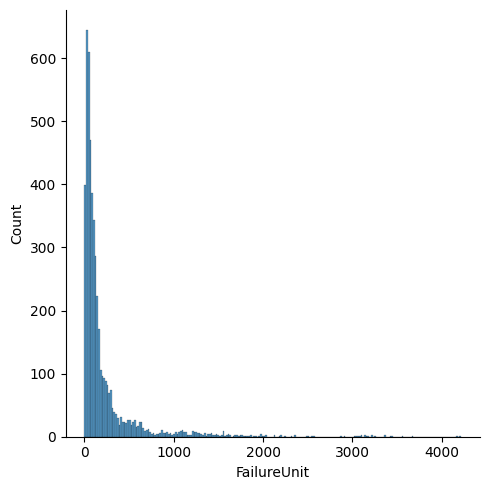

In [39]:
sns.displot(df['FailureUnit'])

In [40]:
df.columns


Index(['YearQuarterId', 'YearGroupId', 'Year', 'Quarter', 'FailureUnit',
       'Zone', 'ZoneCategory', 'Location', 'Capital', 'Region', 'Direction',
       'LocationCategory', 'CalandarYear'],
      dtype='object')

In [41]:
capital_counts = df['Capital'].value_counts().nlargest(5)

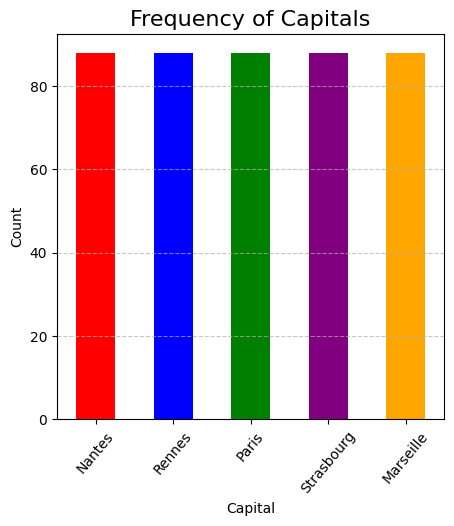

In [42]:
colors = ['red', 'blue', 'green', 'purple', 'orange']
capital_counts.plot(kind='bar', color=colors, figsize=(5, 5))
plt.title('Frequency of Capitals', fontsize=16)
plt.xlabel('Capital', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [43]:
location_counts = df['Location'].value_counts().nlargest(5)

<Figure size 500x500 with 0 Axes>

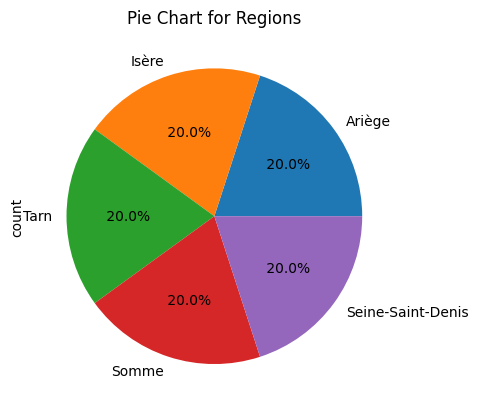

<Figure size 500x500 with 0 Axes>

In [44]:
plt.title('Pie Chart for Regions')
location_counts.plot(kind = "pie", autopct = "%5.1f%%")
plt.figure(figsize=(5,5))

In [45]:
quarter_dist = df['Quarter'].value_counts().nlargest(2)

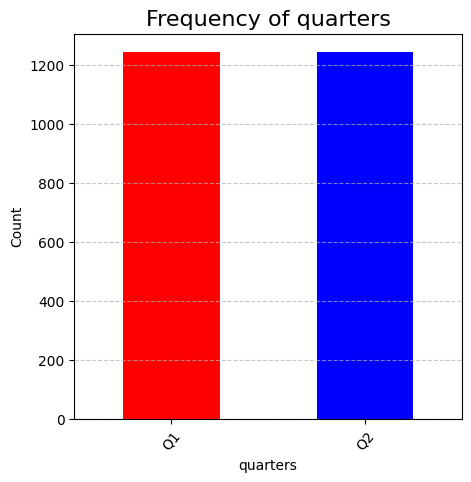

In [46]:

colors = ['red', 'blue'] 
quarter_dist.plot(kind='bar', color=colors, figsize=(5, 5))
plt.title('Frequency of quarters', fontsize=16)
plt.xlabel('quarters', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='ZoneCategory'>

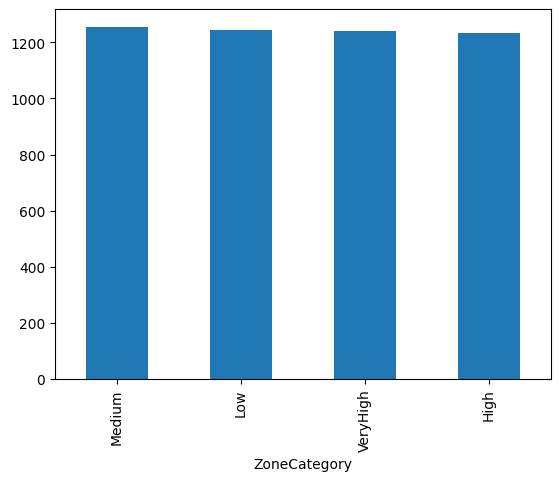

In [47]:
df['ZoneCategory'].value_counts().plot(kind = "bar")

<Axes: ylabel='Zone'>

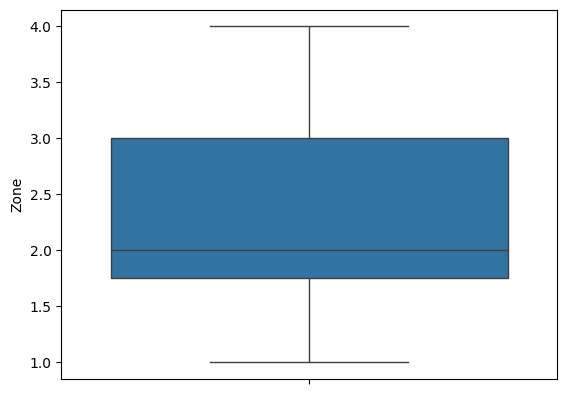

In [48]:
sns.boxplot(df['Zone'])

<Axes: ylabel='FailureUnit'>

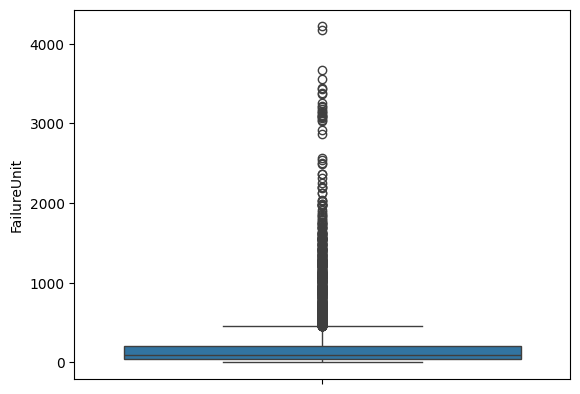

In [49]:
sns.boxplot(df['FailureUnit'])

<Axes: xlabel='CalandarYear'>

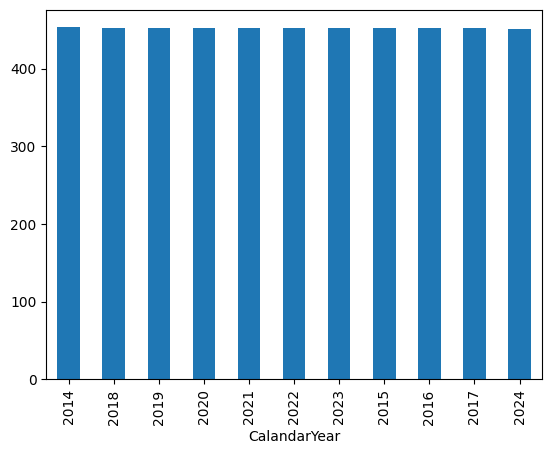

In [50]:
df['CalandarYear'].value_counts().plot(kind = "bar")

 Bivariate Analysis, Categorical vs. Categorical and Categorical vs. Numeric

In [51]:
location_region = pd.crosstab(df['Location'], df['Region'])

<Axes: xlabel='Region', ylabel='Location'>

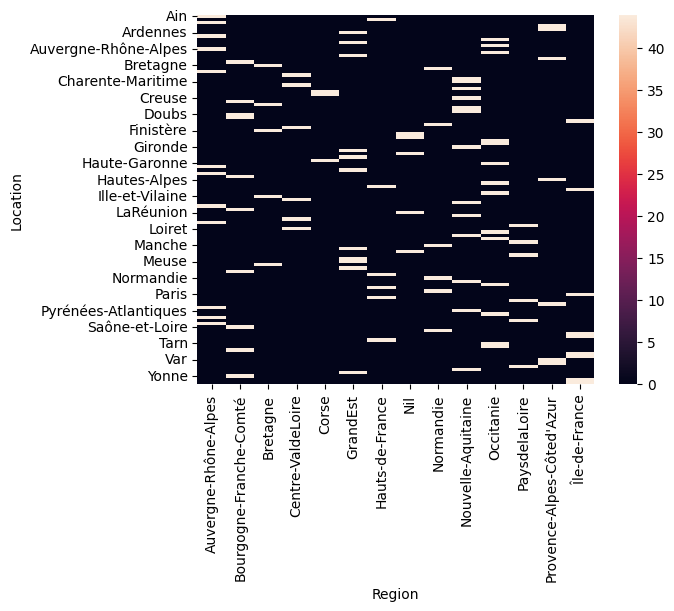

In [52]:
sns.heatmap(data = location_region)

In [53]:
direction_region = pd.crosstab(df['Direction'], df['Region'])

<Axes: xlabel='Region', ylabel='Direction'>

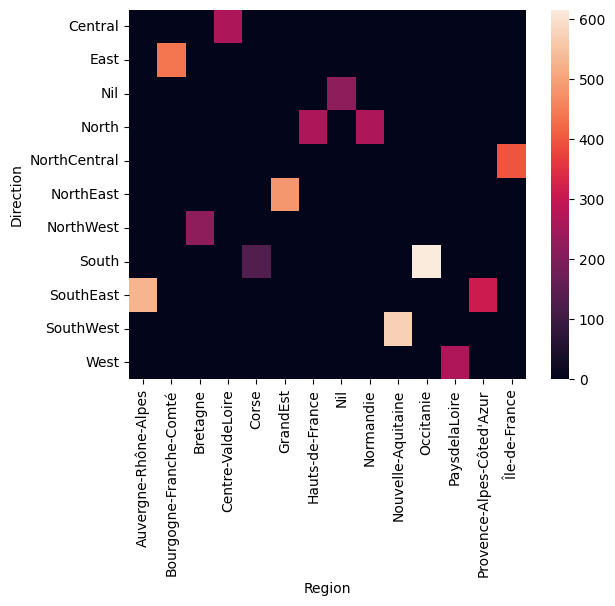

In [54]:
sns.heatmap(data = direction_region)

In [55]:
from scipy.stats import chi2_contingency

In [56]:
contingency_table = pd.crosstab(df['ZoneCategory'], df['Region'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

Chi-Square Statistic: 1453.6571339242878
p-value: 7.03357586999477e-280
Degrees of Freedom: 39
Expected Frequencies:
[[131.04424779 109.20353982  54.60176991  65.52212389  32.76106195
  120.12389381  65.52212389  54.60176991  65.52212389 141.96460177
  152.88495575  65.52212389  76.44247788  98.28318584]
 [132.         110.          55.          66.          33.
  121.          66.          55.          66.         143.
  154.          66.          77.          99.        ]
 [133.27433628 111.0619469   55.53097345  66.63716814  33.31858407
  122.16814159  66.63716814  55.53097345  66.63716814 144.38053097
  155.48672566  66.63716814  77.74336283  99.95575221]
 [131.68141593 109.73451327  54.86725664  65.84070796  32.92035398
  120.7079646   65.84070796  54.86725664  65.84070796 142.65486726
  153.62831858  65.84070796  76.81415929  98.76106195]]


In [57]:
failures_by_zone = df.groupby('ZoneCategory')['FailureUnit'].mean()

In [58]:
failures_by_zone

ZoneCategory
High        137.333874
Low          24.376508
Medium       67.076494
VeryHigh    638.879839
Name: FailureUnit, dtype: float64

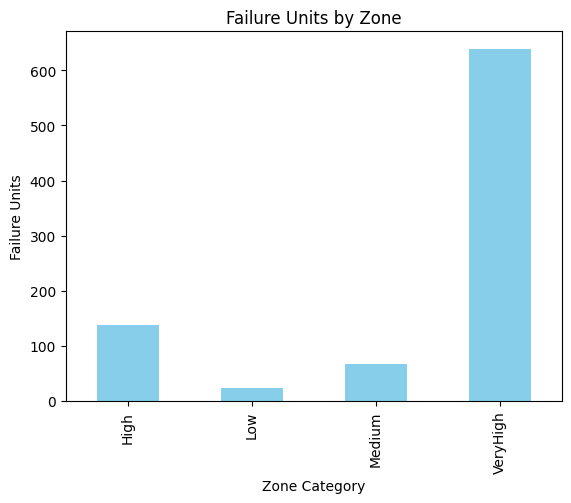

In [59]:
failures_by_zone.plot(kind='bar', color='skyblue', title="Failure Units by Zone")
plt.ylabel("Failure Units")
plt.xlabel("Zone Category")
plt.show()

In [60]:
failures_by_region = df.groupby('Region')['FailureUnit'].mean()

In [61]:
failures_by_region

Region
Auvergne-Rhône-Alpes         234.619318
Bourgogne-Franche-Comté      100.527273
Bretagne                     198.454545
Centre-ValdeLoire            128.306818
Corse                         54.606061
GrandEst                     167.962810
Hauts-de-France              326.128788
Nil                           71.054545
Normandie                    175.121212
Nouvelle-Aquitaine           167.923077
Occitanie                    160.357143
PaysdelaLoire                184.371212
Provence-Alpes-Côted'Azur    370.370130
Île-de-France                597.156566
Name: FailureUnit, dtype: float64

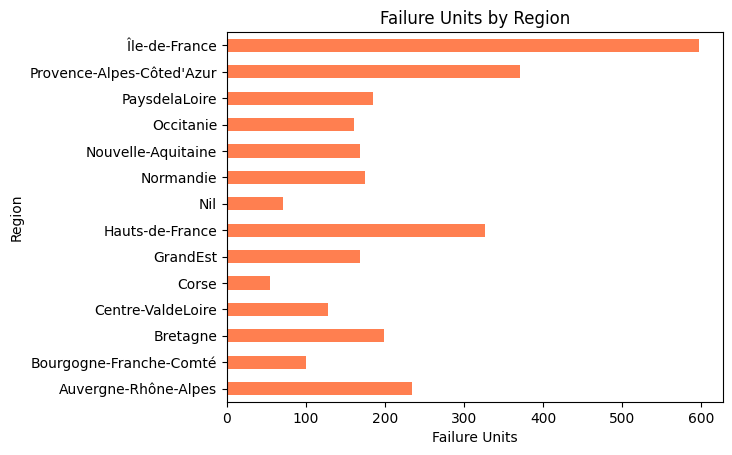

In [62]:
failures_by_region.plot(kind='barh', color='coral', title="Failure Units by Region")
plt.xlabel("Failure Units")
plt.ylabel("Region")
plt.show()

In [63]:
failures_by_direction = df.groupby('Direction')['FailureUnit'].mean()

In [64]:
failures_by_direction

Direction
Central         128.306818
East            100.527273
Nil              71.054545
North           250.625000
NorthCentral    597.156566
NorthEast       167.962810
NorthWest       198.454545
South           141.695187
SouthEast       284.632775
SouthWest       167.923077
West            184.371212
Name: FailureUnit, dtype: float64

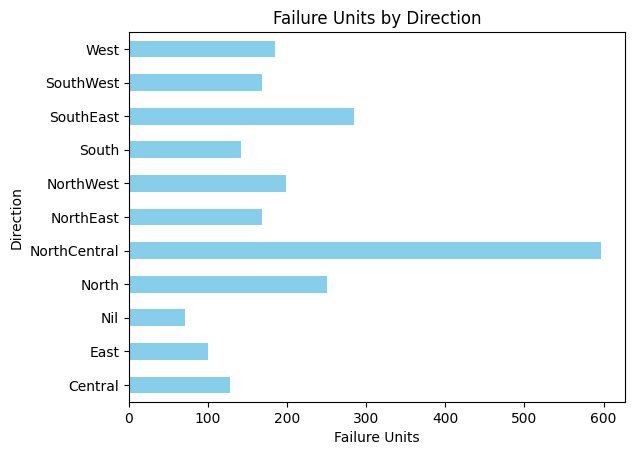

In [65]:
failures_by_direction.plot(kind='barh', color='skyblue', title="Failure Units by Direction")
plt.xlabel("Failure Units")
plt.ylabel("Direction")
plt.show()

In [66]:
failures_by_year= df.groupby('CalandarYear')['FailureUnit'].mean()

In [67]:
failures_by_year

CalandarYear
2014    271.852097
2015    275.008850
2016    253.106195
2017    237.309735
2018    234.112832
2019    221.303097
2020    135.694690
2021    120.073009
2022    179.670354
2023    244.955752
2024    207.660754
Name: FailureUnit, dtype: float64

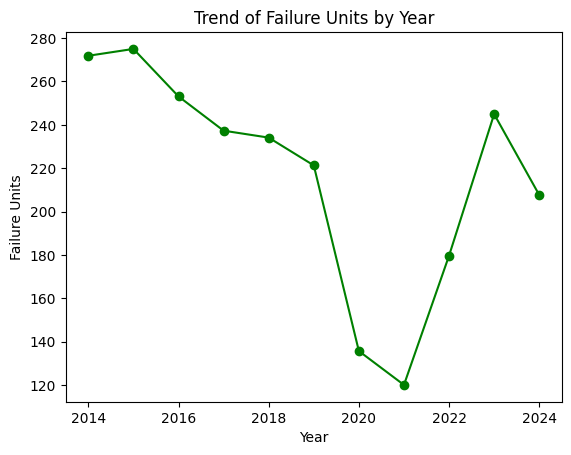

In [68]:
failures_by_year.plot(kind='line', marker='o', color='green', title="Trend of Failure Units by Year")
plt.ylabel("Failure Units")
plt.xlabel("Year")
plt.show()

In [69]:
failures_by_locationcategory = df.groupby('LocationCategory')['FailureUnit'].mean()

In [70]:
failures_by_locationcategory

LocationCategory
C     71.054545
D    126.484689
R    929.762238
Name: FailureUnit, dtype: float64

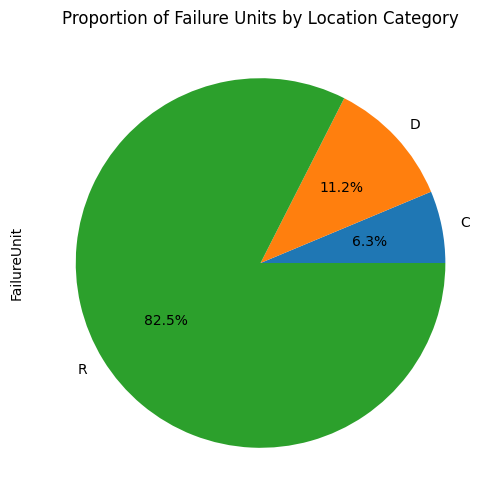

In [71]:
failures_by_locationcategory.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title="Proportion of Failure Units by Location Category")
# plt.ylabel("")  # Remove y-axis label for cleaner output
plt.show()

In [72]:
failures_by_quarter = df.groupby('Quarter')['FailureUnit'].mean()
failures_by_quarter_percentage = (failures_by_quarter / failures_by_quarter.sum()) * 100

In [73]:
failures_by_quarter_percentage

Quarter
Q1    28.803935
Q2    25.318493
Q3    21.608178
Q4    24.269394
Name: FailureUnit, dtype: float64

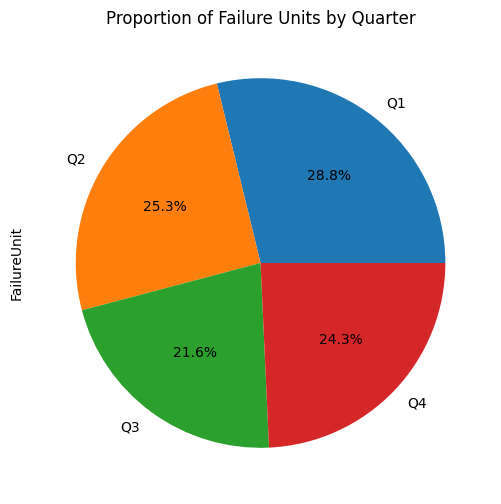

In [74]:
failures_by_quarter_percentage.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title="Proportion of Failure Units by Quarter")
# plt.ylabel("")  # Remove y-axis label for cleaner output
plt.show()

In [75]:
failures_by_location = df.groupby('Location')['FailureUnit'].mean()
failures_by_location_percentage = (failures_by_location / failures_by_location.sum()) * 100

In [76]:
failures_by_location_percentage = failures_by_location_percentage.nlargest(10)

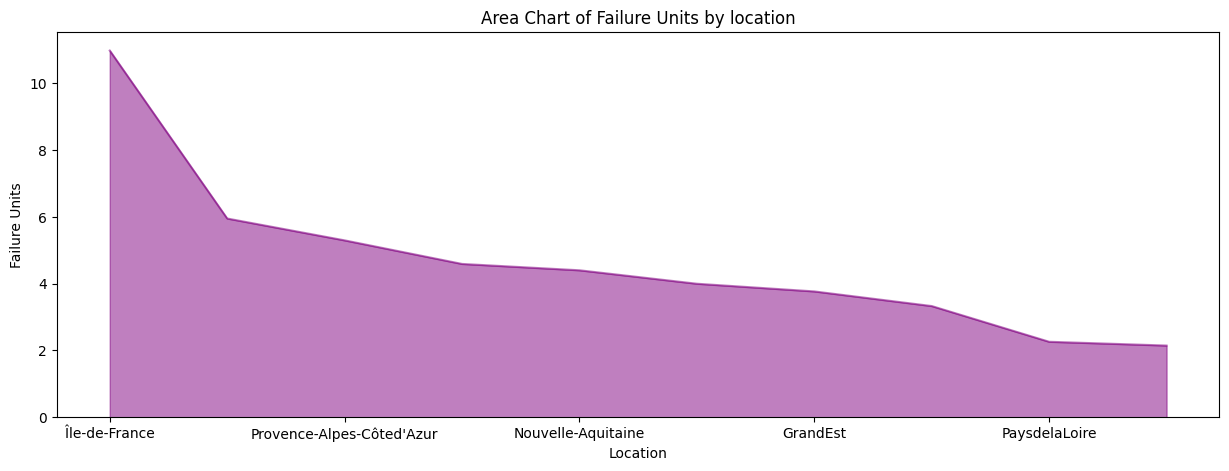

In [77]:
failures_by_location_percentage.plot(kind='area', alpha=0.5, color='purple',figsize=(15, 5), title="Area Chart of Failure Units by location")
plt.ylabel("Failure Units")
plt.xlabel("Location")
plt.show()

In [78]:
failures_by_capital = df.groupby('Capital')['FailureUnit'].mean()
failures_by_capital_percentage = (failures_by_capital / failures_by_capital.sum()) * 100

In [79]:
failures_by_capital_percentage = failures_by_capital_percentage.nlargest(10)

In [80]:
failures_by_capital_percentage

Capital
Paris               10.327656
Marseille            5.302197
Clermont-Ferrand     4.590278
Lille                4.281502
Bordeaux             4.123395
Toulouse             4.030233
Strasbourg           3.338554
Bobigny              2.820064
Orleans              2.567387
Nantes               2.258276
Name: FailureUnit, dtype: float64

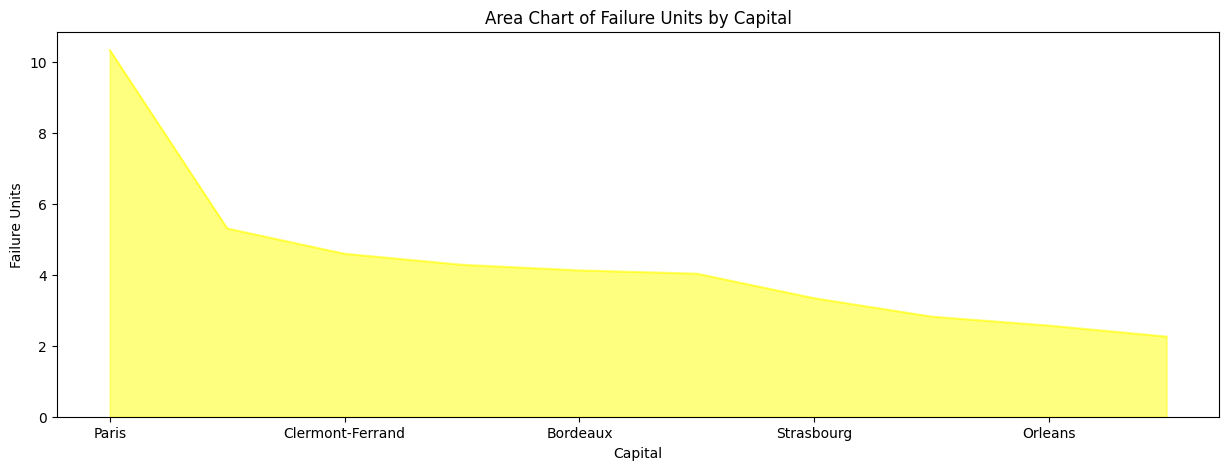

In [81]:
failures_by_capital_percentage.plot(kind='area', alpha=0.5, color='yellow',figsize=(15, 5), title="Area Chart of Failure Units by Capital")
plt.ylabel("Failure Units")
plt.xlabel("Capital")
plt.show()

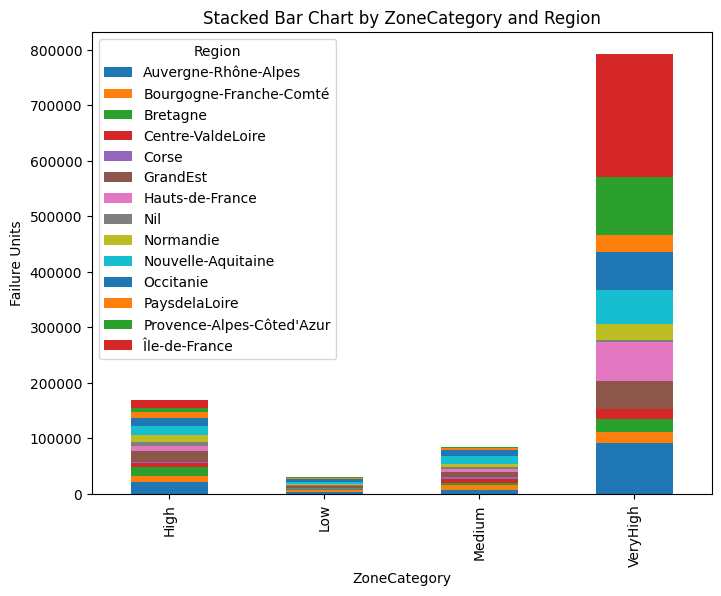

In [82]:
stacked_data = df.pivot_table(values="FailureUnit", index="ZoneCategory", columns="Region", aggfunc='sum')
stacked_data.plot(kind="bar", stacked=True, figsize=(8, 6), title="Stacked Bar Chart by ZoneCategory and Region")
plt.ylabel("Failure Units")
plt.show()

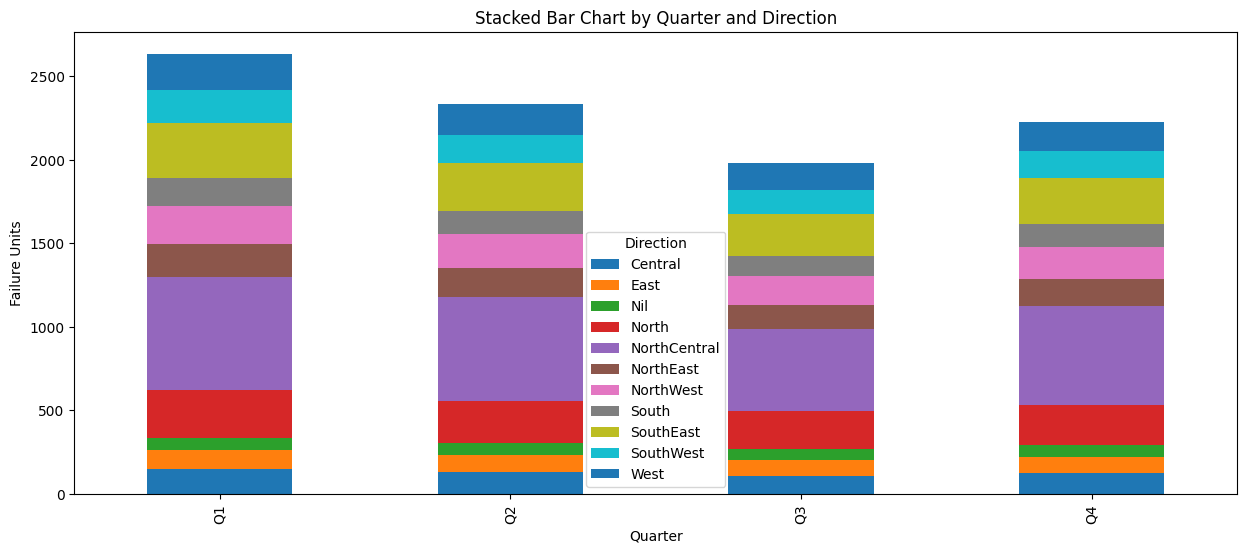

In [83]:
stacked_data = df.pivot_table(values="FailureUnit", index="Quarter", columns="Direction", aggfunc='mean')
stacked_data.plot(kind="bar", stacked=True, figsize=(15, 6), title="Stacked Bar Chart by Quarter and Direction")
plt.ylabel("Failure Units")
plt.show()

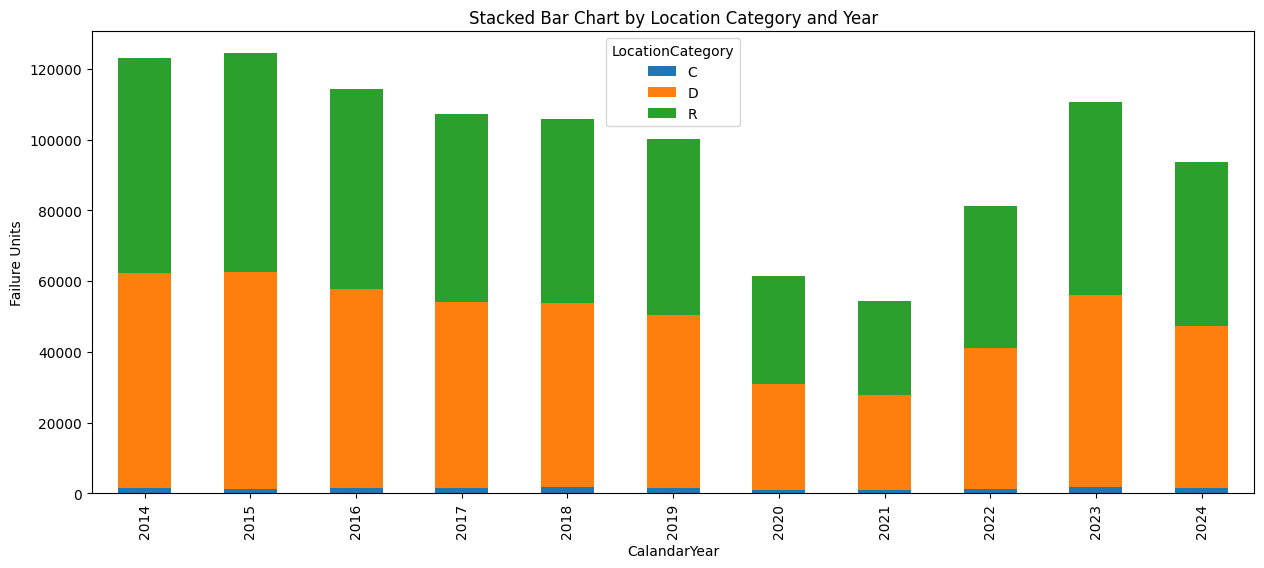

In [84]:
stacked_data = df.pivot_table(values="FailureUnit", index="CalandarYear", columns="LocationCategory", aggfunc='sum')
stacked_data.plot(kind="bar", stacked=True, figsize=(15, 6), title="Stacked Bar Chart by Location Category and Year")
plt.ylabel("Failure Units")
plt.show()

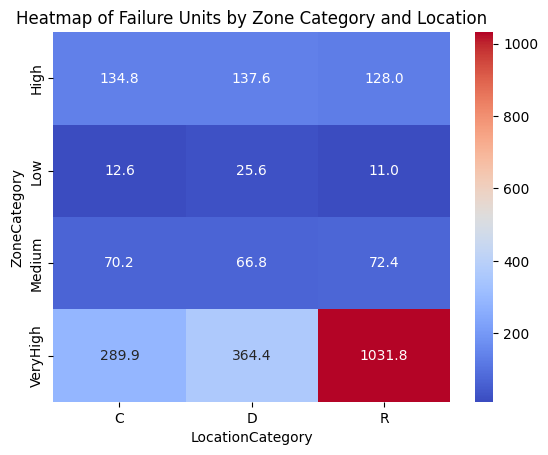

In [85]:
heatmap_data = pd.crosstab(df["ZoneCategory"], df["LocationCategory"], values=df["FailureUnit"], aggfunc=np.mean)
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Heatmap of Failure Units by Zone Category and Location")
plt.show()

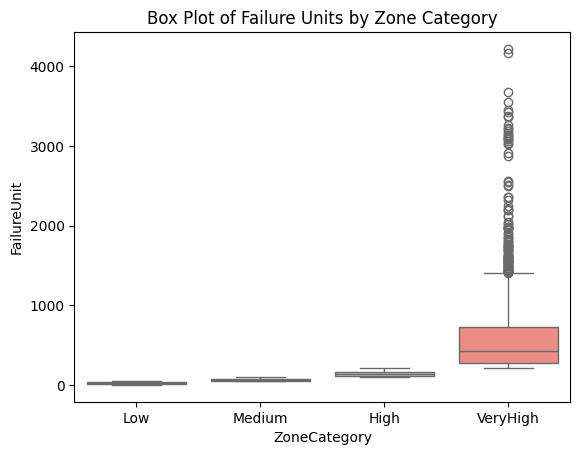

In [86]:
sns.boxplot(data=df, x="ZoneCategory", y="FailureUnit", palette="Set3")
plt.title("Box Plot of Failure Units by Zone Category")
plt.show()

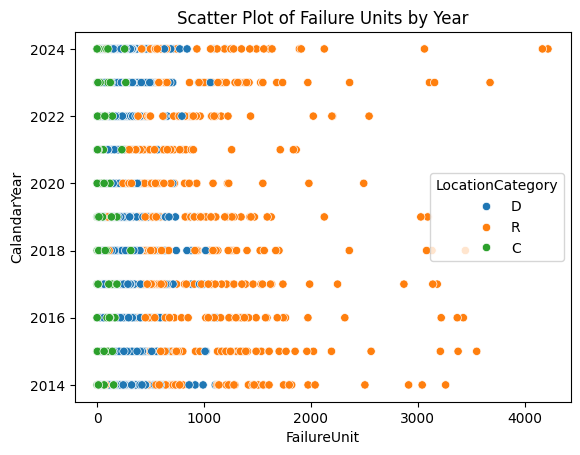

In [87]:
sns.scatterplot(x = 'FailureUnit', y = 'CalandarYear', hue="LocationCategory", data = df)
plt.title("Scatter Plot of Failure Units by Year")
plt.show()

In [88]:
df.columns

Index(['YearQuarterId', 'YearGroupId', 'Year', 'Quarter', 'FailureUnit',
       'Zone', 'ZoneCategory', 'Location', 'Capital', 'Region', 'Direction',
       'LocationCategory', 'CalandarYear'],
      dtype='object')

<Axes: xlabel='FailureUnit', ylabel='Density'>

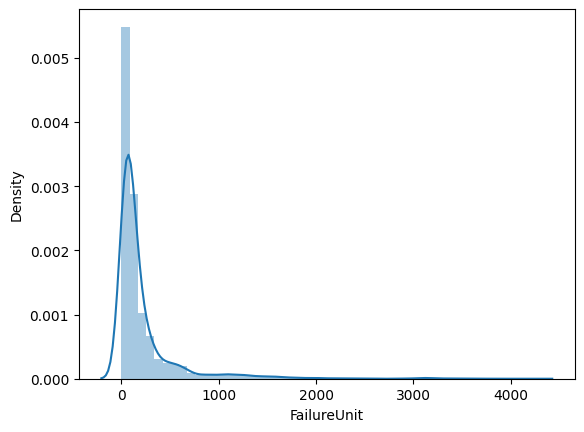

In [89]:
sns.distplot(df['FailureUnit'])

<Axes: xlabel='Zone', ylabel='Density'>

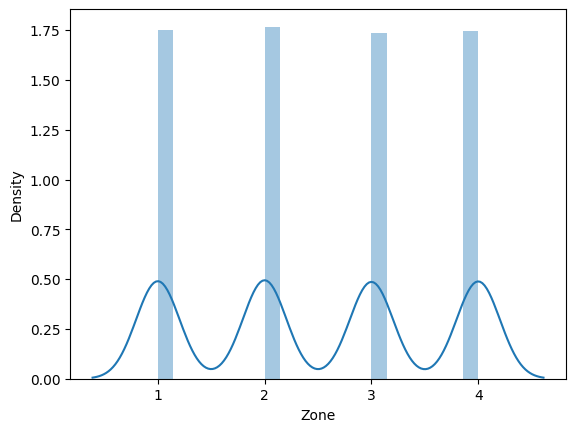

In [90]:
sns.distplot(df['Zone'])

<Axes: xlabel='CalandarYear', ylabel='Density'>

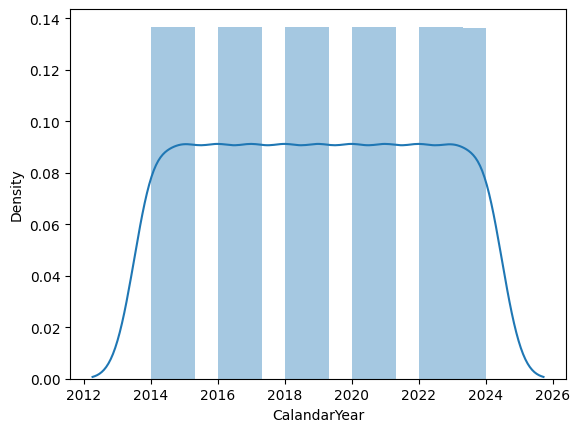

In [91]:
sns.distplot(df['CalandarYear'])

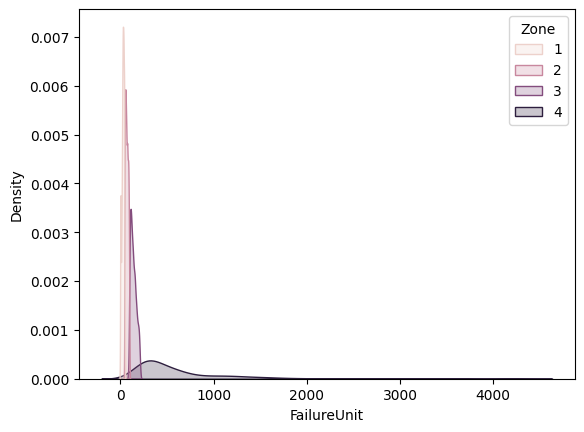

In [92]:
sns.kdeplot(data=df, x="FailureUnit", hue="Zone", shade = True);

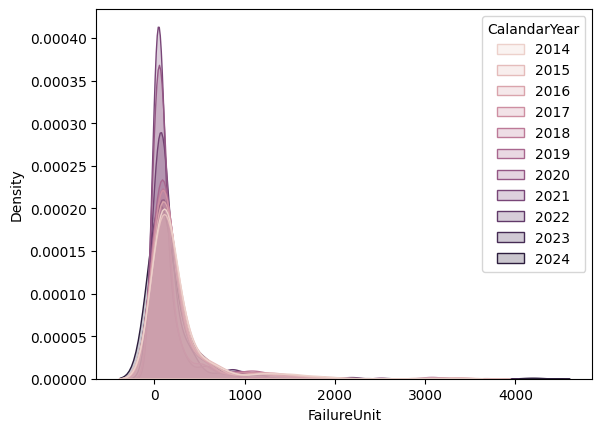

In [93]:
sns.kdeplot(data=df, x="FailureUnit", hue="CalandarYear", shade = True);

<Axes: xlabel='Zone', ylabel='CalandarYear'>

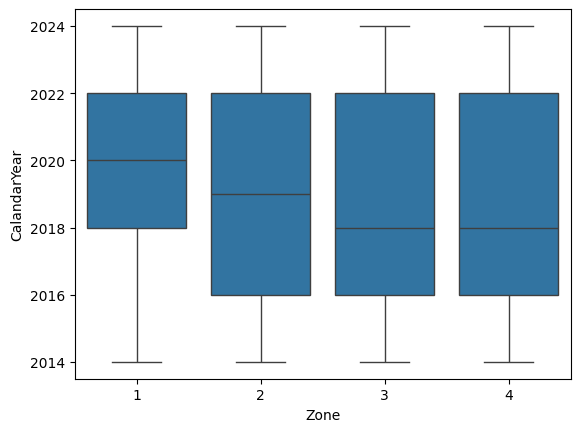

In [94]:

    plt.figure()
    sns.boxplot(data = df, x = "Zone", y = 'CalandarYear')

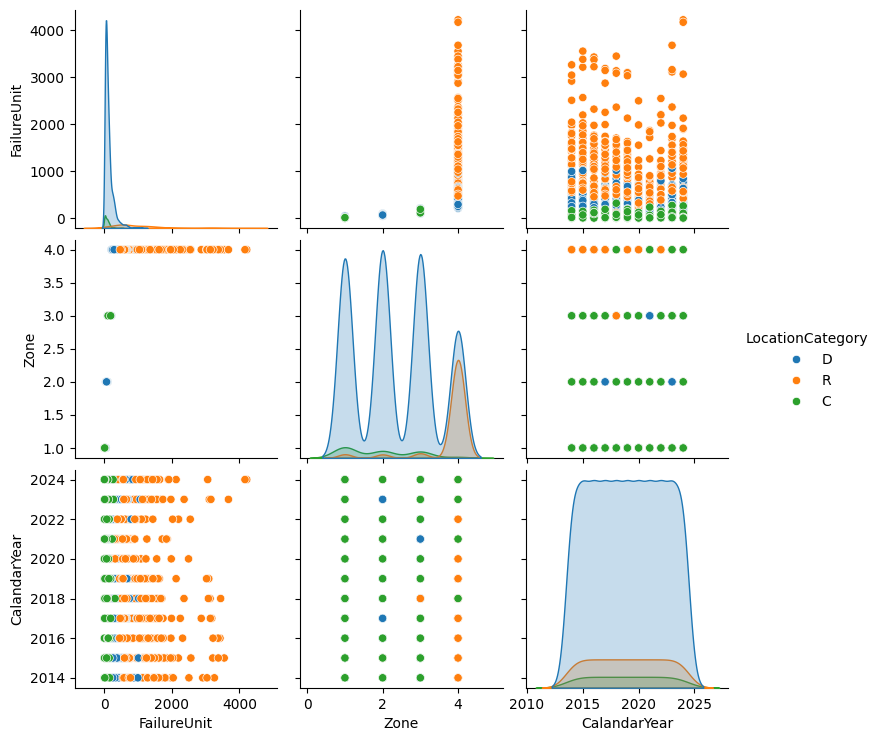

In [95]:
sns.pairplot(data = df, hue ='LocationCategory');

In [96]:
df.corr(numeric_only=True)

,FailureUnit,Zone,CalandarYear
FailureUnit,1.000000,0.565404,-0.075582
Zone,0.565404,1.000000,-0.154582
CalandarYear,-0.075582,-0.154582,1.000000


CLustering - Kmeans

In [97]:
clustering1 = KMeans(n_clusters=4)

In [98]:
clustering1.fit(df[['FailureUnit']])

KMeans(n_clusters=4)

In [99]:
clustering1.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [100]:
df['FU_clusters'] = clustering1.labels_
df.head()

,YearQuarterId,YearGroupId,Year,Quarter,FailureUnit,Zone,ZoneCategory,Location,Capital,Region,Direction,LocationCategory,CalandarYear,FU_clusters
0,2018-Q1,G2018,2018-01-01,Q1,26,1,Low,Ariège,Foix,Occitanie,South,D,2018,1
1,2018-Q1,G2018,2018-01-01,Q1,44,1,Low,Cher,Bourges,Centre-ValdeLoire,Central,D,2018,1
2,2018-Q1,G2018,2018-01-01,Q1,87,2,Medium,Côtes-d'Armor,SaintBrieuc,Bretagne,NorthWest,D,2018,1
3,2018-Q1,G2018,2018-01-01,Q1,116,3,High,Dordogne,Périgueux,Nouvelle-Aquitaine,SouthWest,D,2018,1
4,2018-Q1,G2018,2018-01-01,Q1,84,2,Medium,Doubs,Besançon,Bourgogne-Franche-Comté,East,D,2018,1


In [101]:
df['FU_clusters'].value_counts()

FU_clusters
1    4143
2     583
0     214
3      32
Name: count, dtype: int64

In [102]:
clustering1.inertia_

63255727.41037811

In [103]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['FailureUnit']])
    intertia_scores.append(kmeans.inertia_)

In [104]:
intertia_scores

[711952411.6790025,
 232522091.97559255,
 128605944.74905348,
 63001548.533939414,
 44033795.03232829,
 27800387.38639824,
 22165120.52803708,
 20347176.19387224,
 13183435.819567041,
 11682250.919027543]

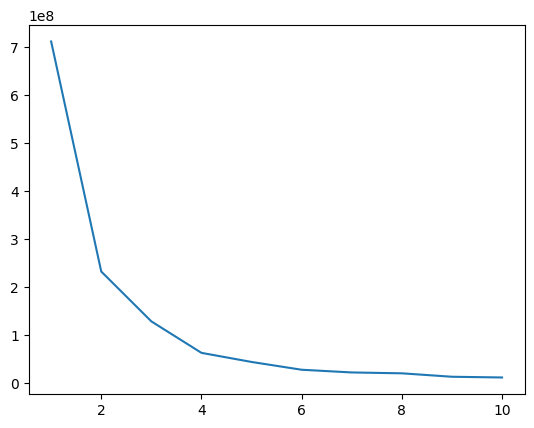

In [105]:
plt.plot(range(1,11),intertia_scores);

In [106]:
df.columns

Index(['YearQuarterId', 'YearGroupId', 'Year', 'Quarter', 'FailureUnit',
       'Zone', 'ZoneCategory', 'Location', 'Capital', 'Region', 'Direction',
       'LocationCategory', 'CalandarYear', 'FU_clusters'],
      dtype='object')

In [107]:
df.groupby('FU_clusters')[['FailureUnit','CalandarYear','Zone']].mean()

,FailureUnit,CalandarYear,Zone
FU_clusters,,,
0,1346.074766,2018.397196,4.000000
1,93.766594,2019.066136,2.196235
2,516.941681,2018.777015,4.000000
3,3070.312500,2018.218750,4.000000


In [108]:
clustering2 = KMeans(n_clusters=6)

In [109]:
clustering2.fit(df[['FailureUnit','CalandarYear']])

KMeans(n_clusters=6)

In [110]:
clustering1.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [111]:
df['FY'] = clustering2.labels_
df.head()

,YearQuarterId,YearGroupId,Year,Quarter,FailureUnit,Zone,ZoneCategory,Location,Capital,Region,Direction,LocationCategory,CalandarYear,FU_clusters,FY
0,2018-Q1,G2018,2018-01-01,Q1,26,1,Low,Ariège,Foix,Occitanie,South,D,2018,1,0
1,2018-Q1,G2018,2018-01-01,Q1,44,1,Low,Cher,Bourges,Centre-ValdeLoire,Central,D,2018,1,0
2,2018-Q1,G2018,2018-01-01,Q1,87,2,Medium,Côtes-d'Armor,SaintBrieuc,Bretagne,NorthWest,D,2018,1,0
3,2018-Q1,G2018,2018-01-01,Q1,116,3,High,Dordogne,Périgueux,Nouvelle-Aquitaine,SouthWest,D,2018,1,0
4,2018-Q1,G2018,2018-01-01,Q1,84,2,Medium,Doubs,Besançon,Bourgogne-Franche-Comté,East,D,2018,1,0


In [112]:
df['FY'].value_counts()

FY
0    3308
3     991
5     386
1     175
4      84
2      28
Name: count, dtype: int64

In [113]:
clustering2.inertia_

27849404.268879727

In [114]:
intertia_scores2=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['FailureUnit','CalandarYear']])
    intertia_scores2.append(kmeans.inertia_)

In [115]:
intertia_scores2

[712002131.6588895,
 232571736.63703093,
 128655524.28087059,
 63139523.46945363,
 44083280.50464462,
 27860007.558547363,
 22193795.58087943,
 16388354.786114242,
 13274800.700537145,
 11027054.558221783]

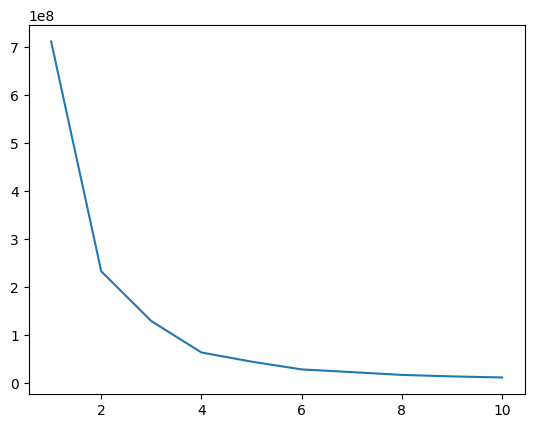

In [116]:
plt.plot(range(1,11),intertia_scores2);

In [117]:
df.columns

Index(['YearQuarterId', 'YearGroupId', 'Year', 'Quarter', 'FailureUnit',
       'Zone', 'ZoneCategory', 'Location', 'Capital', 'Region', 'Direction',
       'LocationCategory', 'CalandarYear', 'FU_clusters', 'FY'],
      dtype='object')

In [118]:
clustering1.cluster_centers_

array([[1348.00938967],
       [  93.9208876 ],
       [ 518.74354561],
       [3070.3125    ]])

In [119]:
clustering2.cluster_centers_

array([[  63.65114873, 2019.21311971],
       [1086.01714286, 2018.77142857],
       [3177.10714286, 2018.17857143],
       [ 233.34510595, 2018.51765893],
       [1704.5952381 , 2018.11904762],
       [ 549.63989637, 2018.74093264]])

In [120]:
cluster2centers = pd.DataFrame(clustering2.cluster_centers_)

In [121]:
cluster2centers

,0,1
0,63.651149,2019.213120
1,1086.017143,2018.771429
2,3177.107143,2018.178571
3,233.345106,2018.517659
4,1704.595238,2018.119048
5,549.639896,2018.740933


In [122]:
cluster1centers = pd.DataFrame(clustering1.cluster_centers_)

In [123]:
cluster1centers

,0
0,1348.009390
1,93.920888
2,518.743546
3,3070.312500


In [124]:
cluster2centers.columns = ['x', 'y']

In [125]:
cluster2centers

,x,y
0,63.651149,2019.213120
1,1086.017143,2018.771429
2,3177.107143,2018.178571
3,233.345106,2018.517659
4,1704.595238,2018.119048
5,549.639896,2018.740933


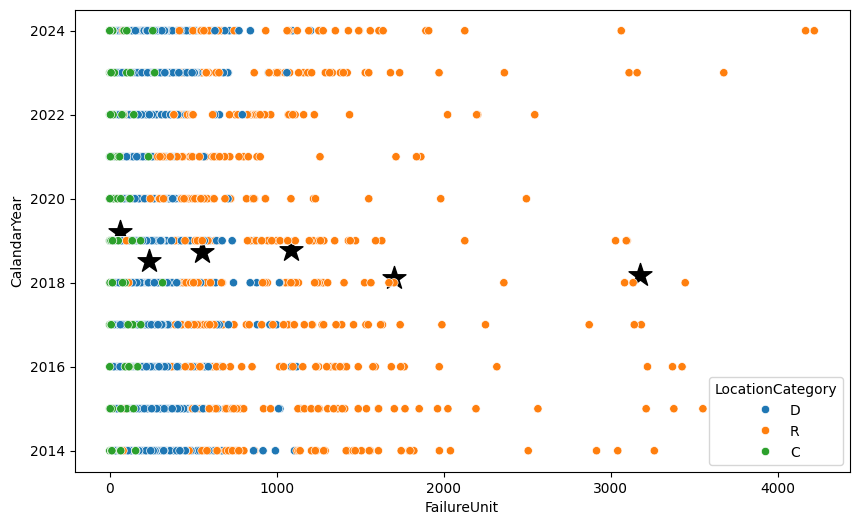

In [126]:
plt.figure(figsize=(10,6))
plt.scatter(x = cluster2centers['x'], y = cluster2centers['y'], s = 300, c = 'black', marker = '*')
sns.scatterplot(data = df, x = 'FailureUnit', y = 'CalandarYear', hue = 'LocationCategory', palette = 'tab10');

In [127]:
pd.crosstab(df['FY'],df['LocationCategory'],normalize='index')

LocationCategory,C,D,R
FY,,,
0,0.058948,0.924123,0.016929
1,0.000000,0.142857,0.857143
2,0.000000,0.000000,1.000000
3,0.024218,0.923310,0.052472
4,0.000000,0.000000,1.000000
5,0.002591,0.474093,0.523316


In [128]:
failures_by_YearQuarterId = df.groupby('YearQuarterId')['FailureUnit'].sum()
failures_by_YearQuarterId_percentage = (failures_by_YearQuarterId / failures_by_YearQuarterId.sum()) * 100

In [129]:
failures_by_YearQuarterId_percentage .nlargest(10)


YearQuarterId
2015-Q1    3.399674
2024-Q1    3.226652
2014-Q1    3.129083
2016-Q1    3.053165
2023-Q4    3.011071
2024-Q2    2.983380
2015-Q4    2.926325
2014-Q4    2.916382
2017-Q1    2.898634
2014-Q2    2.864067
Name: FailureUnit, dtype: float64

In [130]:
FQIDL = failures_by_YearQuarterId.nlargest(10)

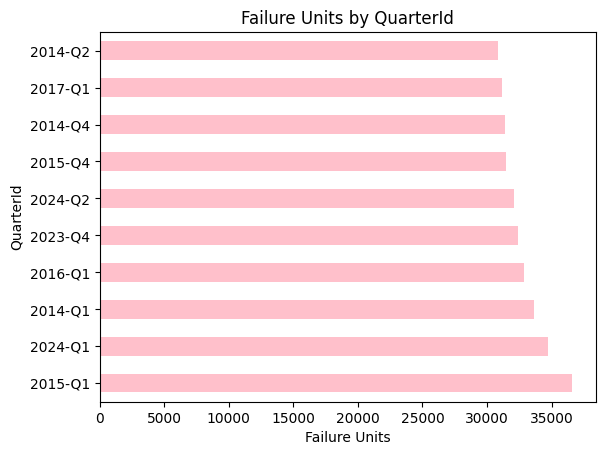

In [131]:
FQIDL.plot(kind='barh', color='pink', title="Failure Units by QuarterId")
plt.xlabel("Failure Units")
plt.ylabel("QuarterId")
plt.show()

In [132]:
failures_by_YearQuarterId_percentage.nsmallest(10)

YearQuarterId
2024-Q4    0.001673
2021-Q3    1.002173
2020-Q2    1.063966
2021-Q2    1.221842
2020-Q3    1.247582
2021-Q1    1.352770
2020-Q4    1.443835
2021-Q4    1.466972
2022-Q3    1.694169
2022-Q2    1.829836
Name: FailureUnit, dtype: float64